# Activity 1.1

First importing the libraries that I will need in this activity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection
from PIL import Image
import scipy.stats as ss
from scipy.interpolate import interp1d

##### 1.) and 2.) Creating the sinusoid along the x-axis and grating frequency.

Rescaling formula:
\begin{equation}
x_{\rm{scaled}} = \frac{x - \rm{min}(x)}{\rm{max}(x) - \rm{min}(x)}
\end{equation}

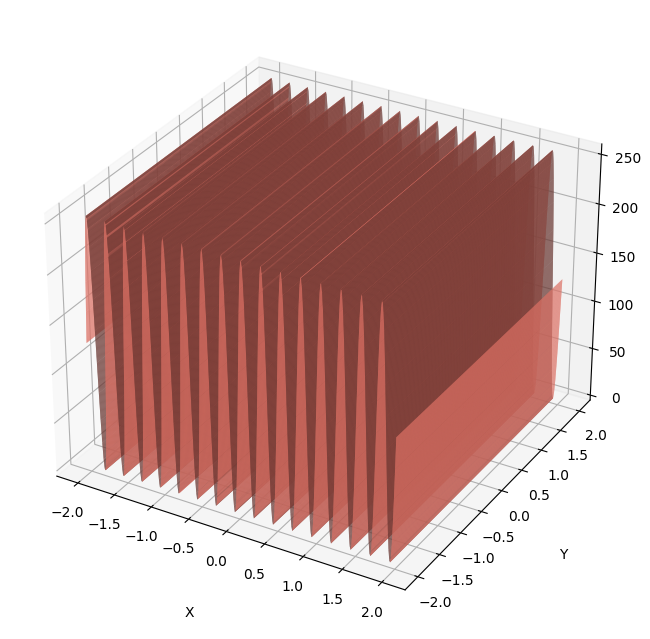

In [2]:
N = 400                    # number of data points
x = np.linspace(-2,2,N)       # range of x values
y = np.linspace(-2,2,N)       # range of y values
X,Y = np.meshgrid(x,y)      # making a mesh from the x and y values

f = 2*np.pi*4                 # cycles per cm
half_amp = 255/2              
R = np.sin(f*X)

R = 255*(R - min(map(min, R)))/(max(map(max,R)) - min(map(min, R)))


A = np.zeros(R.shape)
A[R>half_amp] = 1

fig = plt.figure(figsize = (8,10))
ax = plt.axes(projection='3d')

surface_color = ax.plot_surface(X, Y, R, color = "salmon", rstride=1, cstride=1, alpha=None)

ax.set_xlabel('X', labelpad=20)
ax.set_ylabel('Y', labelpad=20)
ax.set_zlabel('R', labelpad=20)
plt.show()


In [3]:
print(min(map(min, R)))

0.0


Top view of the sine wave using imshow: 


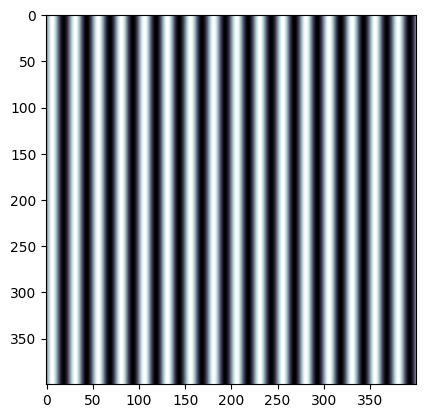

The grid thing: 


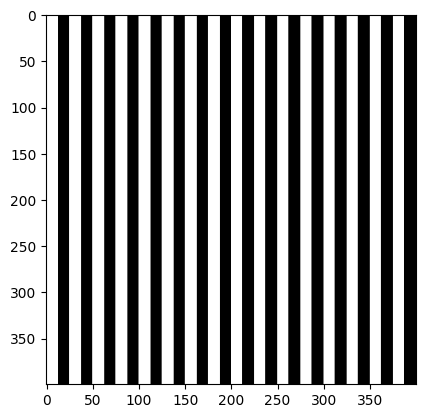

In [4]:
A = np.zeros(R.shape)
A[R>255/2] = 1

print("Top view of the sine wave using imshow: ")
fig, ax = plt.subplots()
ax.imshow(R, cmap = "bone")
plt.show()

print("The grid thing: ")
fig, ax = plt.subplots()
ax.imshow(A, cmap = "gray")
plt.show()

#### 3.) Hubble's Primary Mirror

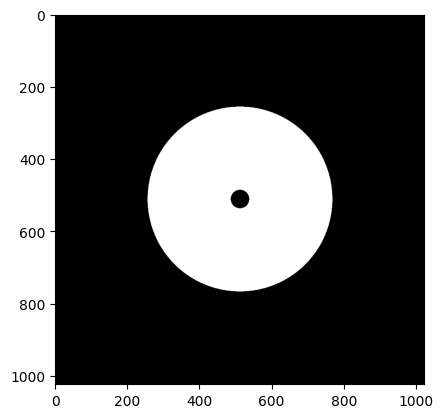

<Figure size 640x480 with 0 Axes>

In [5]:
N = 1024 #the higher num is the finer
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))

outer_radius = 0.5
inner_radius = outer_radius/10

A[R < outer_radius] = 1.0
A[R < inner_radius] = 0

#display as an image

plt.imshow(A, cmap = "gray")
#display as a 3D surface in Cartesian coordinates
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,A)
plt.show()

#### 4.) Hexagon arrray

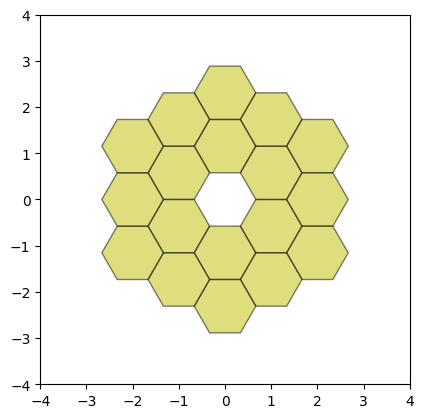

In [6]:
# source: https://www.geeksforgeeks.org/matplotlib-patches-regularpolygon-class-in-python/
# coords: (x,y,orientation)
coord = [[0, 1, -1],
         [-1, 1, 0],
         [-1, 0, 1],
         [0, -1, 1],
         [1, -1, 0],
         [1, 0, -1],
         [0,3,-1],
         [1,3,0],
         [2,1,-1],
         [2,0,0],
         [2,-1, 1],
         [1,-2,1],
         [0,-4,0],
         [-1, -2, 1],
         [-2, -1, 1],
         [-2, 0, 0],
         [-2, 1, -1],
         [-1, 2, -1]]
 
colors = ["y" for c in coord]
 
 
# Horizontal cartesian coords
hcoord = [c[0] for c in coord]
 
# Vertical cartesian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3.
          for c in coord]


 
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
 
# Add some coloured hexagons
for x, y, c in zip(hcoord, vcoord, colors):
     
    # matplotlib understands lower
    # case words for colours
    color = c[0].lower()
    hex = RegularPolygon((x, y),
                         numVertices = 6,
                         radius = 2. / 3.,
                         orientation = np.radians(30),
                         facecolor = color,
                         alpha = 0.5,
                         edgecolor ='k')
     
    ax.add_patch(hex)
    
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
plt.show()

# 1.2

Creating olympic logo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


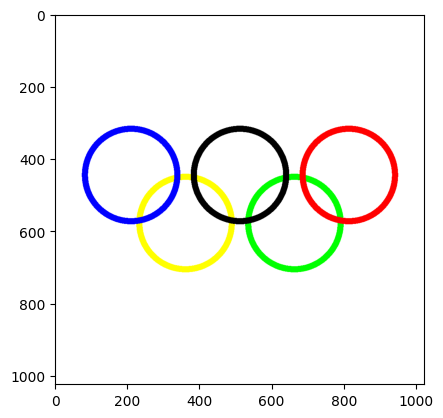

In [7]:
N = 1024
x = np.linspace(-15,15, N)
y = x
X,Y = np.meshgrid(x,y)
Blue, Yellow, Black, Green, Red= np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8),

#draw colored circles
Rt, Rc, deg = 3, 4, 30
xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180)
I = np.ones((N,N,3))
I[...,0] = 255
I[...,1] = 255
I[...,2] = 255


R_Blue = np.sqrt((X+3.4*xt)**2 + (Y+1.3*yt)**2)
R_Black = np.sqrt((X)**2 + (Y+1.3*yt)**2)
R_Red = np.sqrt((X-3.4*xt)**2 + (Y+1.3*yt)**2)
R_Yellow = np.sqrt((X+1.7*xt)**2 + (Y-1.3*yt)**2)
R_Green = np.sqrt((X-1.7*xt)**2 + (Y-1.3*yt)**2)

# Lower row of circles
Green[R_Green<Rc] = 255
Green[R_Green == R_Black] = 0
Green[R_Green == R_Red] = 0
Green[R_Green < (Rc -0.5)] = 0

Yellow[R_Yellow < Rc] = 255
Yellow[R_Yellow == R_Blue] = 0 
Yellow[R_Yellow == R_Black] = 0 
Yellow[R_Yellow < (Rc -0.5)] = 0

# Upper row of circles
Blue[R_Blue<Rc]= 255
Blue[R_Blue < (Rc -0.5)] = 0

Black[R_Black<Rc] = 255
Black[R_Black < (Rc -0.5)] = 0

Red[R_Red<Rc] = 255
Red[R_Red < (Rc -0.5)] = 0



I[...,0] = 255 - Blue - Black                           #Red
I[...,1] = 255 - Blue - Black  - Red                    #Green
I[...,2] = 255 - Black - Red                            #Blue


I[...,2] = I[...,2]  - Yellow + Blue                  

I[...,0] = I[...,0] - Green + Red
I[...,2] = I[...,2] - Green 






I[I<0] = 0
I[I>255] = 255

fig = plt.figure()
plt.imshow(I)

plt.show()

In [8]:
img = I.astype(np.uint8)
plt.imsave("coloredcircle.jpg",img)
plt.imsave("coloredcircle.bmp",img)
plt.imsave("coloredcircle.png",img)
plt.imsave("coloredcircle.tiff",img)

# 1.4

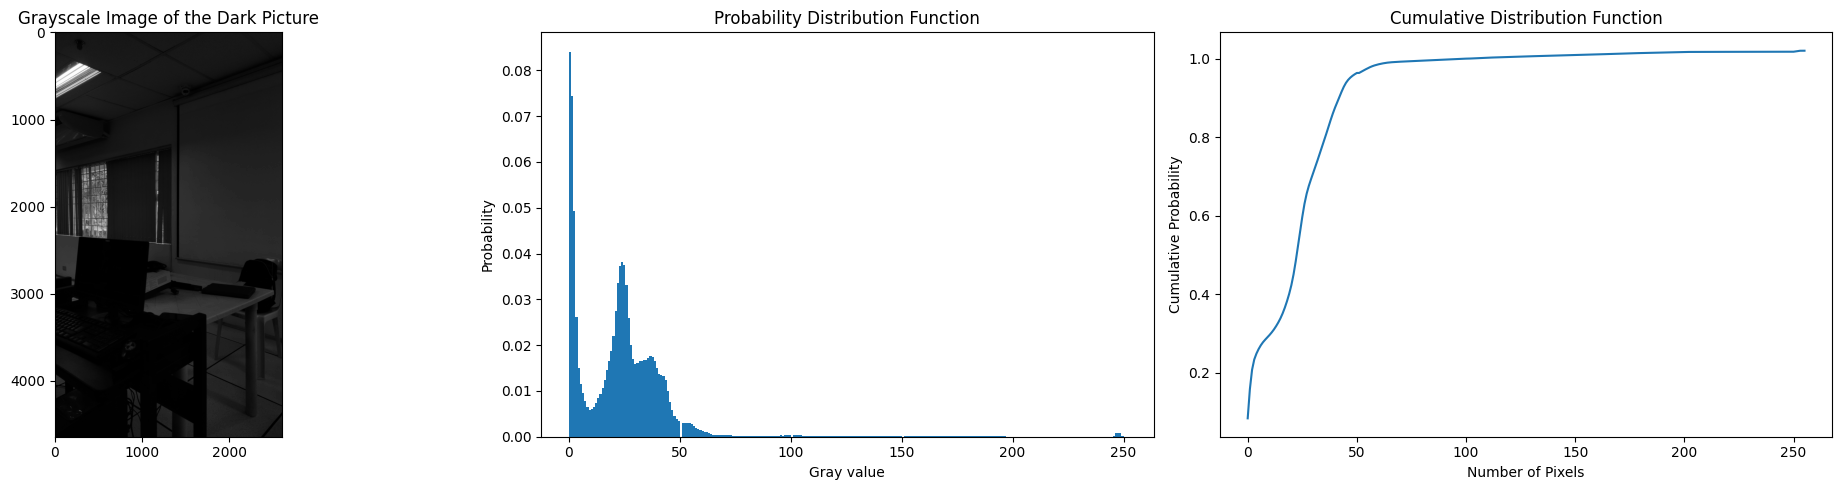

In [18]:
# read the image 
image = Image.open('.\dark_picture.jpg')

# Converting to grayscale
processed_image = np.array(image.convert('L'))

# Making the histogram of the grayscaled image
# Flattening image to make the program more efficient
x = np.arange(0,256,1)
flattened = processed_image.flatten()
norm_hist_values, bin_edges  = np.histogram(flattened, bins = 256, density = True)


# Now making the CDF
CDF = np.cumsum(norm_hist_values)

# plotting the PDF and CDF
fig, ax = plt.subplots(1,3, figsize = (20,5))
ax[0].imshow(processed_image, cmap = "gray")
ax[0].set_title("Grayscale Image of the Dark Picture")


ax[1].hist(flattened, density = True, bins = 256)
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Gray value")
ax[1].set_title("Probability Distribution Function")

ax[2].plot(x, CDF)
ax[2].set_ylabel("Cumulative Probability")
ax[2].set_xlabel("Number of Pixels")
ax[2].set_title("Cumulative Distribution Function")
plt.tight_layout()
plt.show()


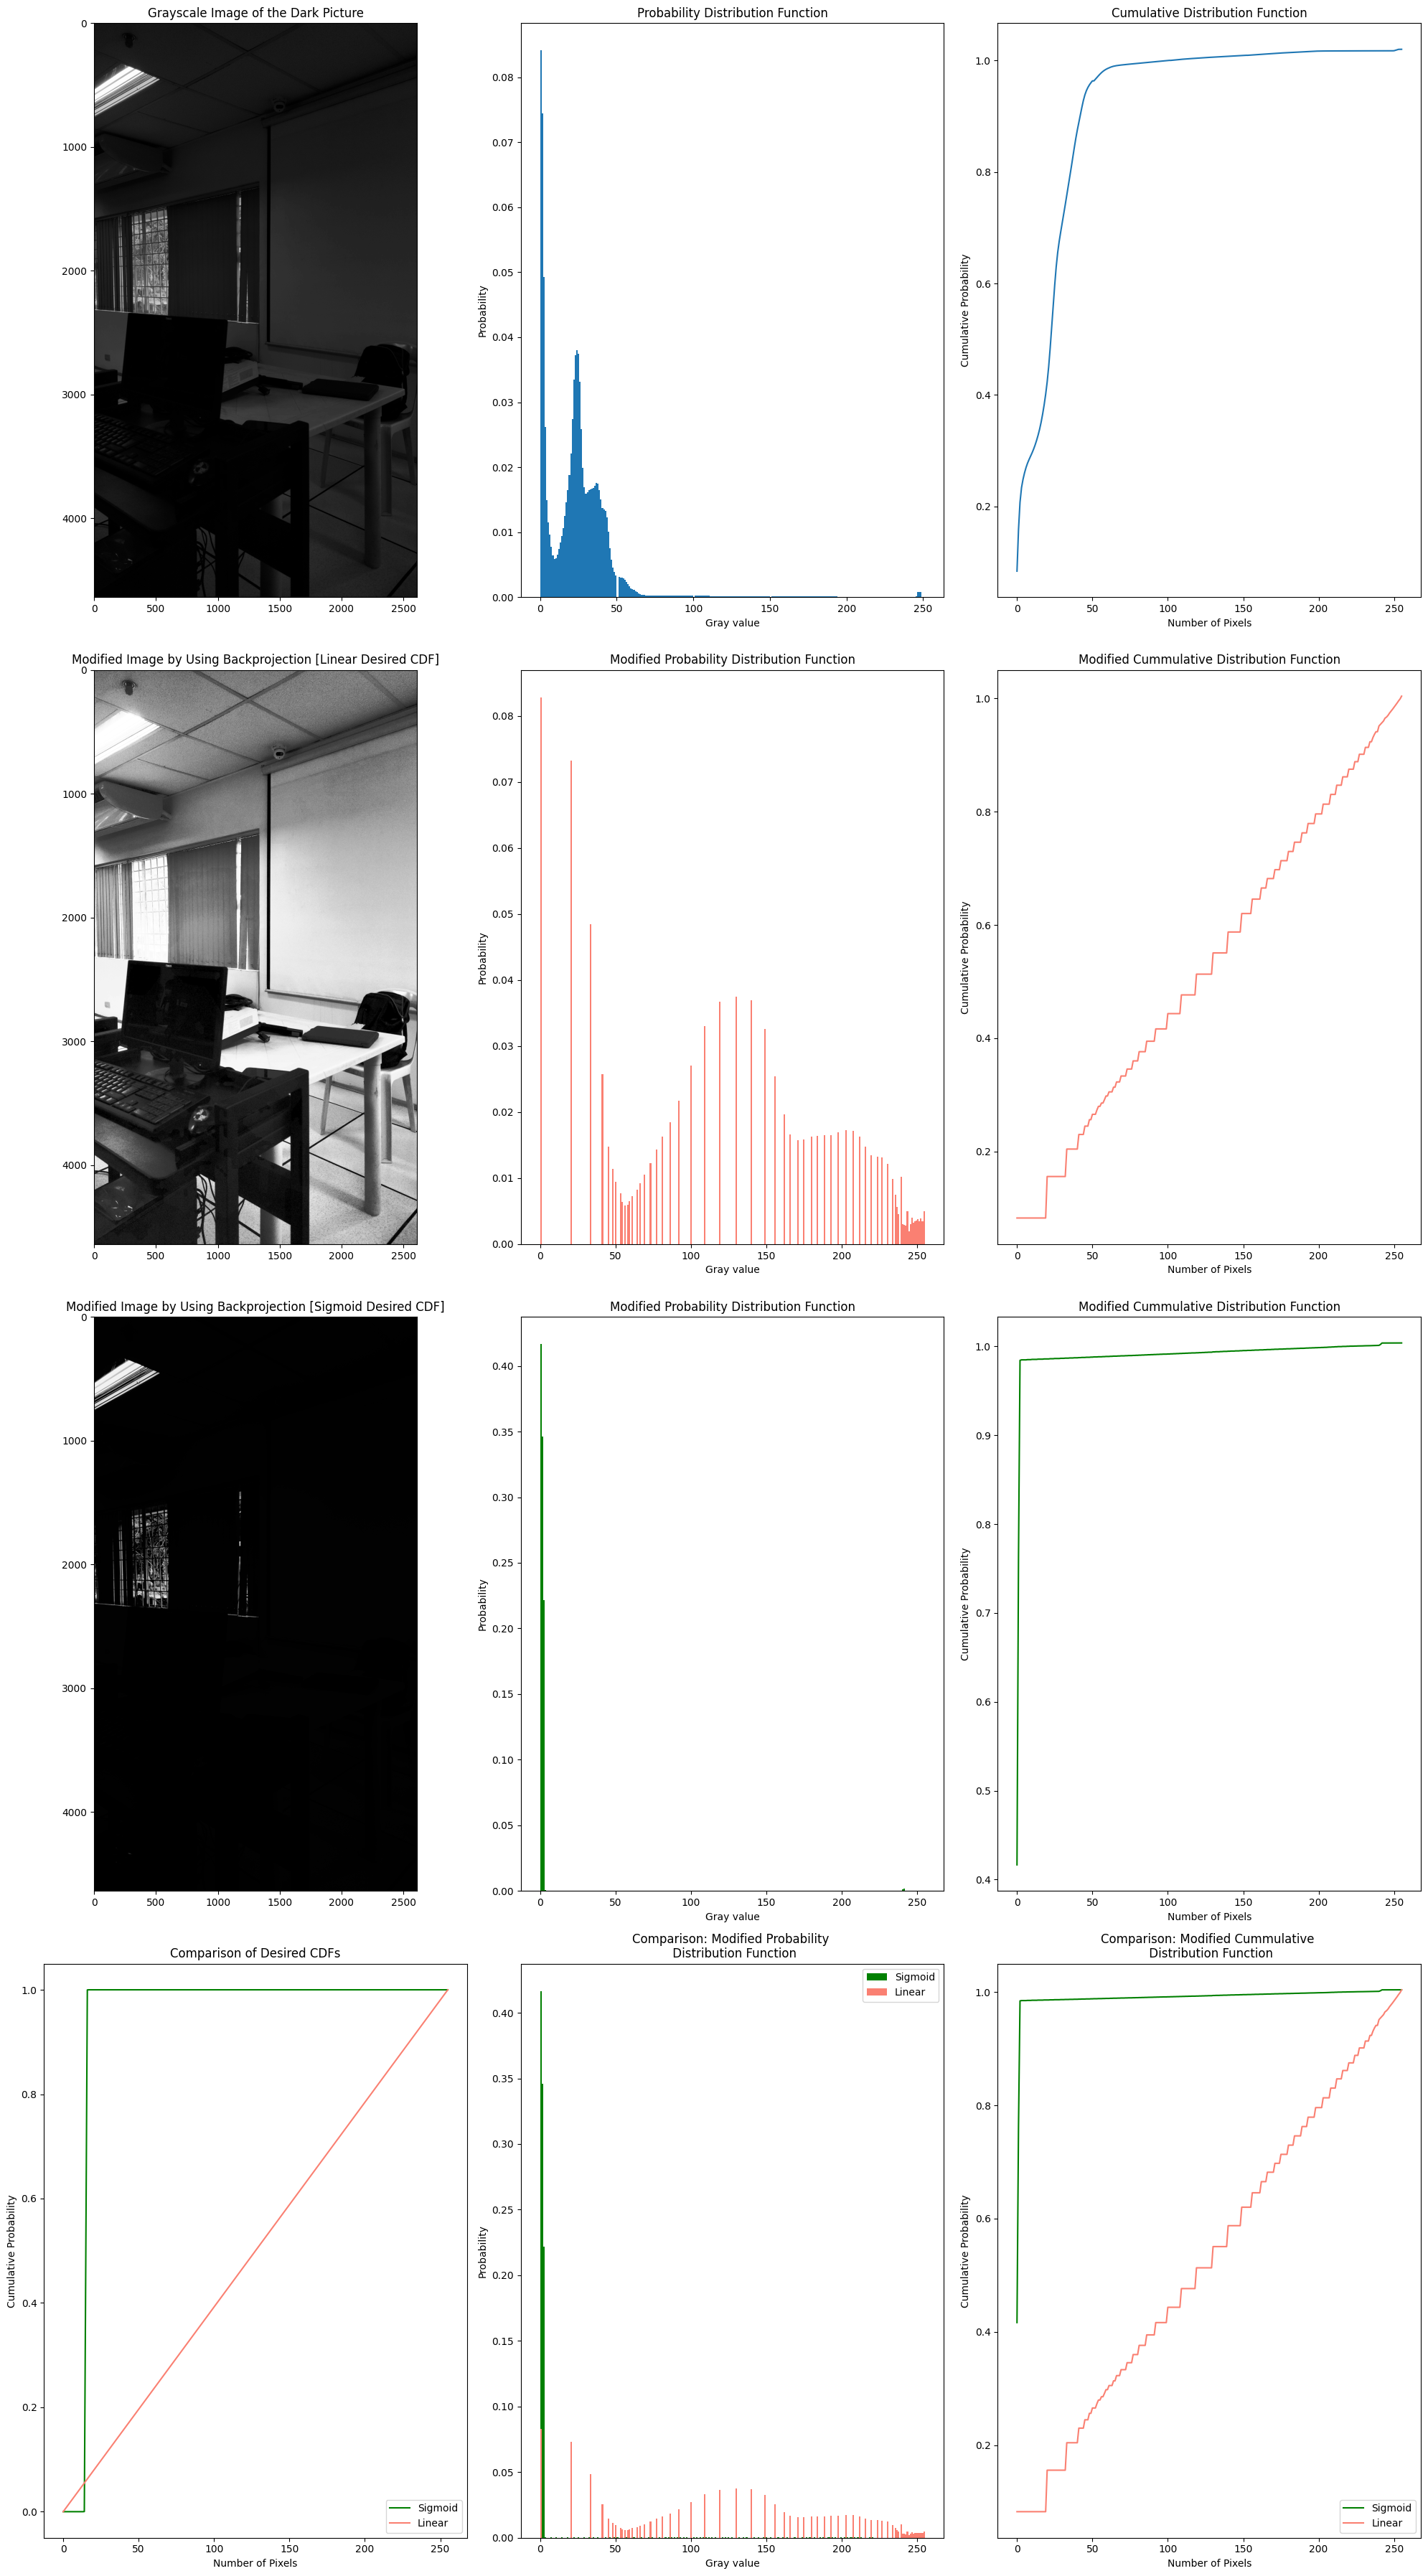

In [31]:
# Now applying histogram backprojecting
desired_CDF = x/255
new_GS = np.interp(CDF[flattened], x, desired_CDF)
new_GS = np.reshape(new_GS, processed_image.shape)
new_GS = 255*(new_GS - np.min(new_GS))/(np.max(new_GS) - np.min(new_GS))

# Making PDF and CDF
GS_flattened = new_GS.flatten()
GS_norm_hist_values, bin_edges  = np.histogram(GS_flattened, bins = 256, density = True)

GS_CDF = np.cumsum(GS_norm_hist_values)


#Doing backprojecting using sigmoid CDF
sigmoid_CDF = 1/(1+np.exp(-(8.5*x-(255/2))))
sigmoid_new_GS = np.interp(CDF[flattened], x, sigmoid_CDF)
sigmoid_new_GS = np.reshape(sigmoid_new_GS, processed_image.shape)
sigmoid_new_GS = 255*(sigmoid_new_GS - np.min(sigmoid_new_GS))/(np.max(sigmoid_new_GS) - np.min(sigmoid_new_GS))

# Making PDF and CDF
sigmoid_GS_flattened = sigmoid_new_GS.flatten()
sigmoid_GS_norm_hist_values, bin_edges  = np.histogram(sigmoid_GS_flattened, bins = 256, density = True)

sigmoid_GS_CDF = np.cumsum(sigmoid_GS_norm_hist_values)


# Plotting everything

# Original
fig, ax = plt.subplots(4,3, figsize = (20, 36))
ax[0,0].imshow(processed_image, cmap = "gray")
ax[0,0].set_title("Grayscale Image of the Dark Picture")


ax[0,1].hist(flattened, density = True, bins = 256)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Gray value")
ax[0,1].set_title("Probability Distribution Function")

ax[0,2].plot(x, CDF)
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Number of Pixels")
ax[0,2].set_title("Cumulative Distribution Function")

# Linear
ax[1,0].imshow(new_GS, cmap = "gray")
ax[1,0].set_title("Modified Image by Using Backprojection [Linear Desired CDF]")

ax[1,1].hist(GS_flattened, bins = 256, density = True, color = "salmon")
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Gray value")
ax[1,1].set_title("Modified Probability Distribution Function")


ax[1,2].plot(x, GS_CDF, color = "salmon")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Number of Pixels")
ax[1,2].set_title("Modified Cummulative Distribution Function")

# Sigmoid
ax[2,0].imshow(sigmoid_new_GS, cmap = "gray")
ax[2,0].set_title("Modified Image by Using Backprojection [Sigmoid Desired CDF]")

ax[2,1].hist(sigmoid_GS_flattened, bins = 256, density = True, color = "g")
ax[2,1].set_ylabel("Probability")
ax[2,1].set_xlabel("Gray value")
ax[2,1].set_title("Modified Probability Distribution Function")


ax[2,2].plot(x, sigmoid_GS_CDF, color = "g")
ax[2,2].set_ylabel("Cumulative Probability")
ax[2,2].set_xlabel("Number of Pixels")
ax[2,2].set_title("Modified Cummulative Distribution Function")

# Comparison
ax[3,0].plot(sigmoid_CDF, color = "g", label = "Sigmoid")
ax[3,0].plot(desired_CDF, color = "salmon", label = "Linear")
ax[3,0].set_ylabel("Cumulative Probability")
ax[3,0].set_xlabel("Number of Pixels")
ax[3,0].set_title( "Comparison of Desired CDFs")
ax[3,0].legend()


ax[3,1].hist(sigmoid_GS_flattened, bins = 256, density = True, color = "g", label = "Sigmoid")
ax[3,1].hist(GS_flattened, bins = 256, density = True, color = "salmon", label = "Linear")
ax[3,1].set_ylabel("Probability")
ax[3,1].set_xlabel("Gray value")
ax[3,1].set_title( "Comparison: Modified Probability \n Distribution Function")
ax[3,1].legend()


ax[3,2].plot(x, sigmoid_GS_CDF, color = "g", label = "Sigmoid")
ax[3,2].plot(x, GS_CDF, color = "salmon", label = "Linear")
ax[3,2].set_ylabel("Cumulative Probability")
ax[3,2].set_xlabel("Number of Pixels")
ax[3,2].set_title("Comparison: Modified Cummulative \n Distribution Function")
ax[3,2].legend()


plt.tight_layout()
plt.show()



# 1.5

for contrast stretching:
$$
I_{\rm{new}} = \frac{I_{\rm{old}} - I_{\rm{min}}}{I_{\rm{max}} - I_{\rm{min}}}
$$

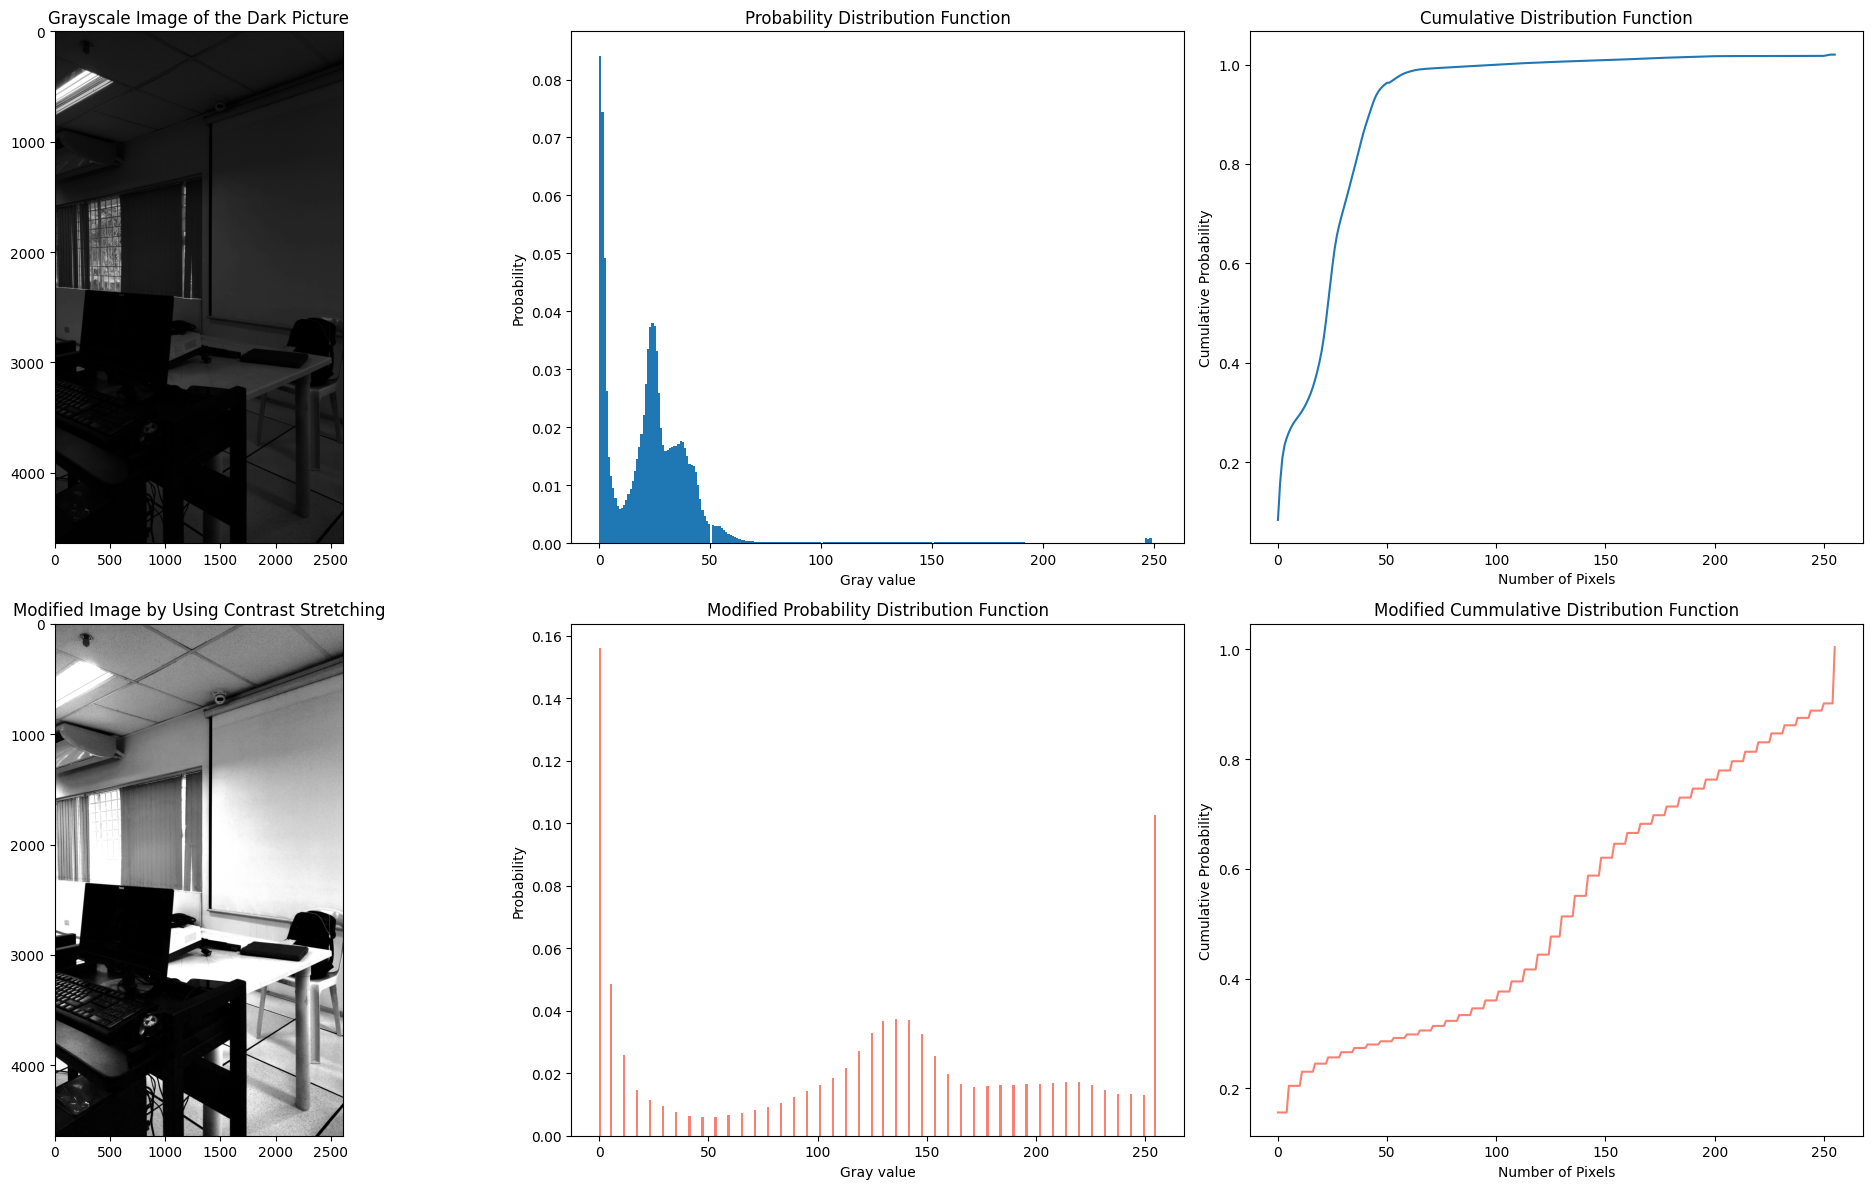

In [11]:
# read the image 
image = Image.open('.\dark_picture.jpg')

# Converting to grayscale
processed_image = np.array(image.convert('L'))

# Now making the PDF
flattened = processed_image.flatten()

# Getting hist values and normalizing them
hist_values, bin_edges  = np.histogram(flattened, bins = 256, density = True)

# Now making the CDF
CDF = np.cumsum(norm_hist_values)




# Applying contrast stretching
Imin = np.percentile(processed_image, 10)
Imax = np.percentile(processed_image, 90)
contrast_stretched = 255*(processed_image - Imin)/(Imax - Imin)
contrast_stretched[contrast_stretched < 0] = 0
contrast_stretched[contrast_stretched > 255] = 255

# Getting PDF and CDF of contrast stretched image
contrast_flattened = contrast_stretched.flatten()

# Getting hist values and normalizing them
contrast_hist_values, bin_edges  = np.histogram(contrast_flattened, bins = 256, density = True)

# Now making the CDF
contrast_CDF = np.cumsum(contrast_hist_values)





# Plotting everything
fig, ax = plt.subplots(2,3, figsize = (20, 12))
ax[0,0].imshow(processed_image, cmap = "gray")
ax[0,0].set_title("Grayscale Image of the Dark Picture")


ax[0,1].hist(flattened, density = True, bins = 256)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Gray value")
ax[0,1].set_title("Probability Distribution Function")

ax[0,2].plot(x, CDF)
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Number of Pixels")
ax[0,2].set_title("Cumulative Distribution Function")


ax[1,0].imshow(contrast_stretched, cmap = "gray")
ax[1,0].set_title("Modified Image by Using Contrast Stretching")

ax[1,1].hist(contrast_flattened, bins = 256, density = True, color = "salmon")
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Gray value")
ax[1,1].set_title("Modified Probability Distribution Function")


ax[1,2].plot(x, contrast_CDF, color = "salmon")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Number of Pixels")
ax[1,2].set_title("Modified Cummulative Distribution Function")
plt.tight_layout()
plt.show()


# 1.6

## a. Contrast Stretching

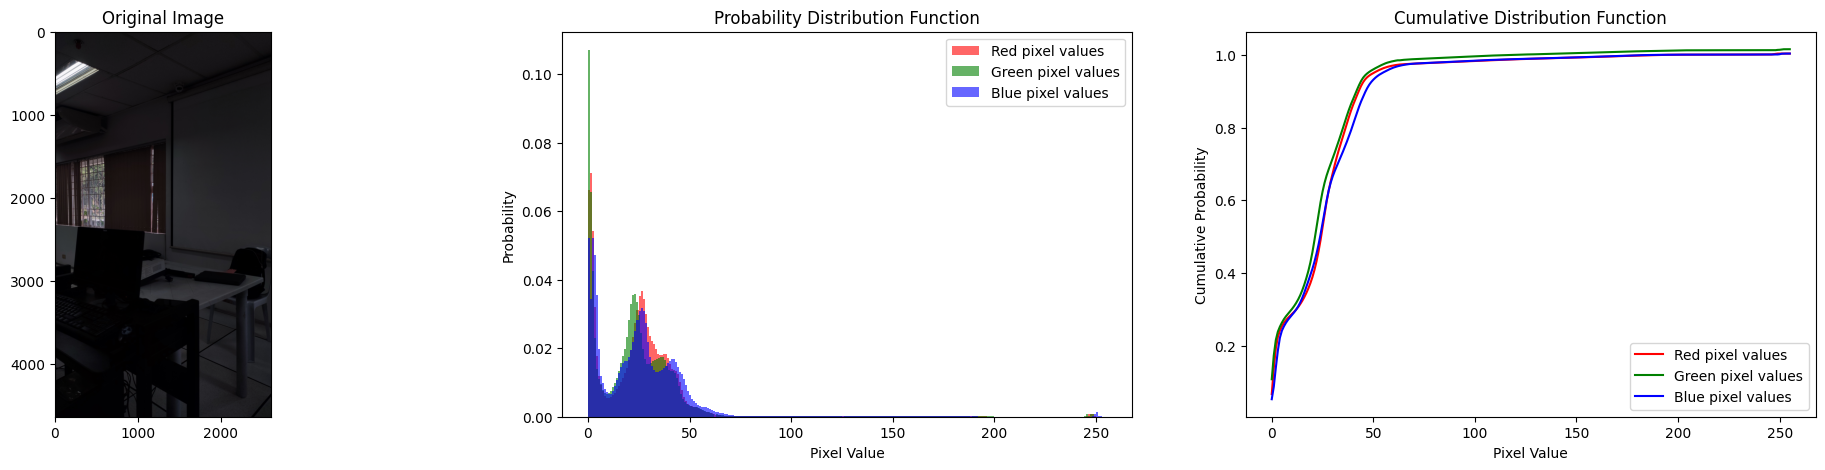

In [79]:
# The image was taken from instagram. The photo was taken by Joseph Karl Salva
# link: https://www.instagram.com/p/CnoL2x4vVdV/?utm_source=ig_web_copy_link
# read the image 
I = Image.open('.\dark_picture.jpg')
I = np.array(I, np.uint8)

# Getting the color channels
I_R = I[:,:,0]
I_G = I[:,:,1]
I_B = I[:,:,2]

# Getting hist values and normalizing them
R_norm_hist_values, bin_edges  = np.histogram(I_R, bins = 256, density = True)
G_norm_hist_values, bin_edges  = np.histogram(I_G, bins = 256, density = True)
B_norm_hist_values, bin_edges  = np.histogram(I_B, bins = 256, density = True)

# Now making the CDF
R_CDF = np.cumsum(R_norm_hist_values)
G_CDF = np.cumsum(G_norm_hist_values)
B_CDF = np.cumsum(B_norm_hist_values)

# Plotting everything
fig, ax = plt.subplots(1,3, figsize = (25,5))
ax[0].imshow(I)
ax[0].set_title("Original Image")

ax[1].hist(I_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[1].hist(I_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[1].hist(I_B.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Pixel Value")
ax[1].set_title("Probability Distribution Function")
ax[1].legend()

ax[2].plot(x, R_CDF, color = "r", label = "Red pixel values")
ax[2].plot(x, G_CDF, color = "g", label = "Green pixel values")
ax[2].plot(x, B_CDF, color = "b", label = "Blue pixel values")
ax[2].set_ylabel("Cumulative Probability")
ax[2].set_xlabel("Pixel Value")
ax[2].set_title("Cumulative Distribution Function")
ax[2].legend()
plt.show()

2.0 47.0


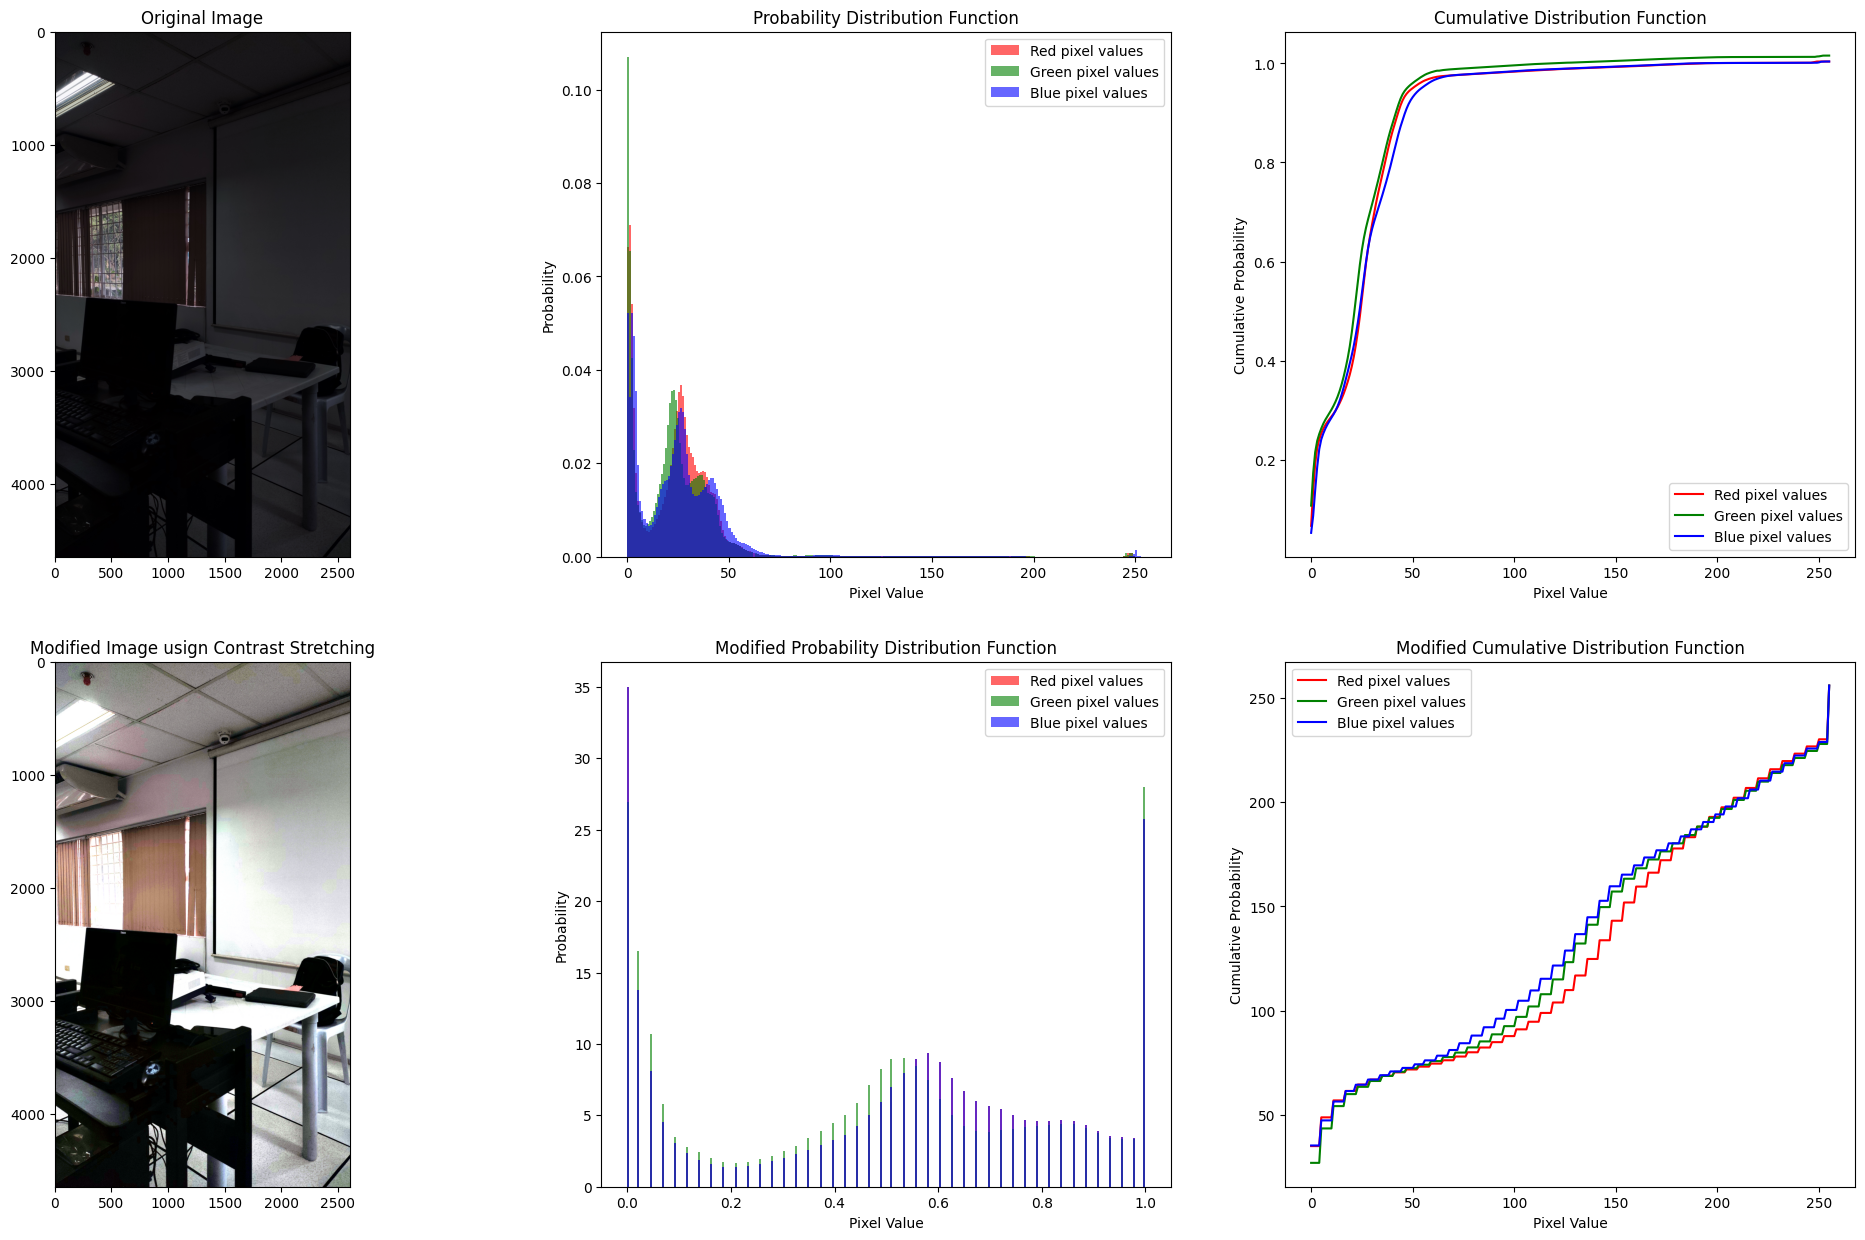

In [80]:
# Applying contrast stretching on each color

I_R_min = np.percentile(I_R, 10)
I_R_max = np.percentile(I_R, 90)
contrast_stretched_R = (I_R - I_R_min)/(I_R_max - I_R_min)
contrast_stretched_R[contrast_stretched_R > 1] = 1
contrast_stretched_R[contrast_stretched_R < 0] = 0


I_G_min = np.percentile(I_G, 10)
I_G_max = np.percentile(I_G, 90)
contrast_stretched_G = (I_G - I_G_min)/(I_G_max - I_G_min)
contrast_stretched_G[contrast_stretched_G > 1] = 1
contrast_stretched_G[contrast_stretched_G < 0] = 0


I_B_min = np.percentile(I_B, 10)
I_B_max = np.percentile(I_B, 90)
contrast_stretched_B = (I_B - I_B_min)/(I_B_max - I_B_min)
contrast_stretched_B[contrast_stretched_B > 1] = 1
contrast_stretched_B[contrast_stretched_B < 0] = 0


stretched_I = np.zeros(I.shape)
stretched_I[:,:,0] = contrast_stretched_R
stretched_I[:,:,1] = contrast_stretched_G
stretched_I[:,:,2] = contrast_stretched_B

# Getting stretched PDF and CDF

# Getting hist values and normalizing them
stretched_R_norm_hist_values, bin_edges  = np.histogram(contrast_stretched_R, bins = 256, density = True)
stretched_G_norm_hist_values, bin_edges  = np.histogram(contrast_stretched_G, bins = 256, density = True)
stretched_B_norm_hist_values, bin_edges  = np.histogram(contrast_stretched_B, bins = 256, density = True)

# Now making the CDF
stretched_R_CDF = np.cumsum(stretched_R_norm_hist_values)
stretched_G_CDF = np.cumsum(stretched_G_norm_hist_values)
stretched_B_CDF = np.cumsum(stretched_B_norm_hist_values)


# Plotting everything
fig, ax = plt.subplots(2,3, figsize = (25,15))
ax[0,0].imshow(I)
ax[0,0].set_title("Original Image")

ax[0,1].hist(I_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[0,1].hist(I_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[0,1].hist(I_B.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Pixel Value")
ax[0,1].set_title("Probability Distribution Function")
ax[0,1].legend()

ax[0,2].plot(x, R_CDF, color = "r", label = "Red pixel values")
ax[0,2].plot(x, G_CDF, color = "g", label = "Green pixel values")
ax[0,2].plot(x, B_CDF, color = "b", label = "Blue pixel values")
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Pixel Value")
ax[0,2].set_title("Cumulative Distribution Function")
ax[0,2].legend()

ax[1,0].imshow(stretched_I)
ax[1,0].set_title("Modified Image usign Contrast Stretching")

ax[1,1].hist(contrast_stretched_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[1,1].hist(contrast_stretched_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[1,1].hist(contrast_stretched_R.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Pixel Value")
ax[1,1].set_title("Modified Probability Distribution Function")
ax[1,1].legend()

ax[1,2].plot(x, stretched_R_CDF, color = "r", label = "Red pixel values")
ax[1,2].plot(x, stretched_G_CDF, color = "g", label = "Green pixel values")
ax[1,2].plot(x, stretched_B_CDF, color = "b", label = "Blue pixel values")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Pixel Value")
ax[1,2].set_title("Modified Cumulative Distribution Function")
ax[1,2].legend()
plt.show()

## b. Gray World Algorithm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


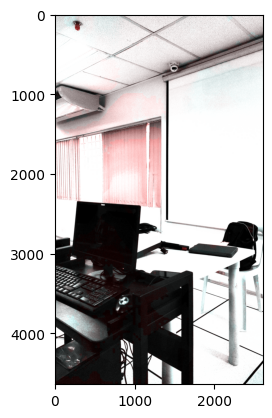

In [81]:
Rwb = I_R/np.average(I_R)
Gwb = I_G/np.average(I_G)
Bwb = I_B/np.average(I_B)

Iwb = np.zeros(I.shape)
Iwb[:,:,0] = Rwb
Iwb[:,:,1] = Gwb
Iwb[:,:,2] = Gwb

plt.imshow(Iwb)
plt.show()